# Урок 9. Линейная регрессия. Логистическая регрессия

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

***
## Задание 1.

In [2]:
df1 = pd.DataFrame({'X': np.array([30, 30, 40, 40]),
                    'Y': np.array([37, 47, 50, 60])})

In [3]:
df2 = pd.DataFrame({'X': np.array([30, 30, 40, 40, 20, 20, 50, 50]),
                    'Y': np.array([37, 47, 50, 60, 25, 35, 62, 72])})

In [4]:
df3 = pd.DataFrame({'X': np.array([30, 30, 40, 40, 20, 20, 50, 50, 10, 10, 60, 60]),
                    'Y': np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])})

### 1.1 Постройте графики для приведенных наборов данных.<br>Нанесите на график модель линейной регрессии.

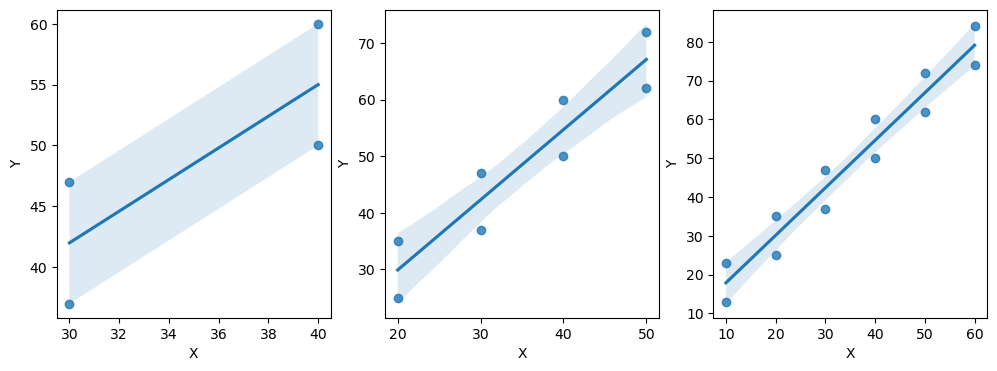

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(4*3, 4))

sns.regplot(x = 'X', y = 'Y', data = df1, ax=ax[0])
sns.regplot(x = 'X', y = 'Y', data = df2, ax=ax[1])
sns.regplot(x = 'X', y = 'Y', data = df3, ax=ax[2]);

### 1.2 Найдите коэффициенты для линии регрессии и коэффициенты детерминации.

In [6]:
X = df3[['X']].values
y = df3['Y'].values

In [7]:
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

reg.coef_[0], reg.intercept_

(1.225714285714285, 5.600000000000023)

In [8]:
#коэффициент детерминации
reg.score(X, y)

0.9459101071621309

In [9]:
#коэффициент детерминации
np.corrcoef(df3.X, df3.Y)[1,0]**2

0.9459101071621309

***
## Задание 2.

In [10]:
dataset = [
    {'X': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     'Y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    
    {'X': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     'Y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]},
    
    {'X': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
     'Y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    
    {'X': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
     'Y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]},
    
    {'X': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7,5, 15, 16, 18 ],
     'Y': [9.14, 8.14, 8.74,8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74, 6.5, 5, 2.9]}
]

### 2.1 Для какого графика можно использовать модель линейной регрессии?

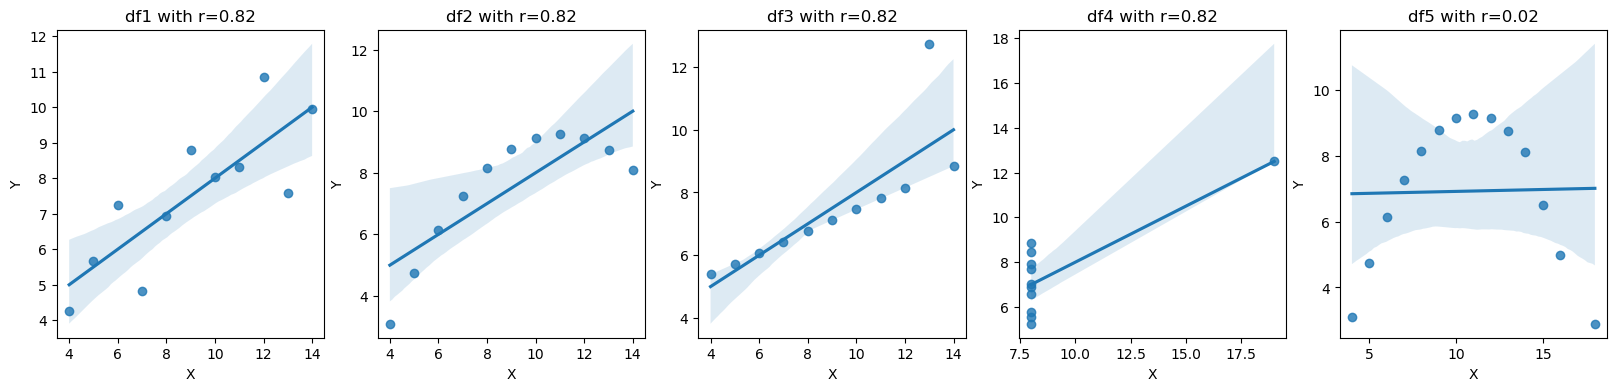

In [11]:
fig, ax = plt.subplots(1, 5, figsize=(4*5, 4))

for i,data in enumerate(dataset):
    df = pd.DataFrame(data)
    sns.regplot(x = 'X', y = 'Y', data = df, ax=ax[i])
    r = np.corrcoef(df.X, df.Y)[1,0]
    ax[i].set_title(f"df{i+1} with r={r:.2f}")

### 2.2 Постройте модель линейной регрессии для подходящих данных.

In [12]:
X = np.array(dataset[0]['X']).reshape(-1,1)
y = np.array(dataset[0]['Y'])

In [13]:
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
y_pred

array([ 8.001     ,  7.00081818,  9.50127273,  7.50090909,  8.50109091,
       10.00136364,  6.00063636,  5.00045455,  9.00118182,  6.50072727,
        5.50054545])

In [14]:
reg.coef_[0], reg.intercept_

(0.5000909090909091, 3.0000909090909103)

In [15]:
R = reg.score(X, y)
R

0.666542459508775

### 2.3 Проверить оставшиеся условия применимости линейной регрессии.

#### Независимость остатков

In [16]:
rem = y - y_pred.reshape(1,-1)
rem

array([[ 0.039     , -0.05081818, -1.92127273,  1.30909091, -0.17109091,
        -0.04136364,  1.23936364, -0.74045455,  1.83881818, -1.68072727,
         0.17945455]])

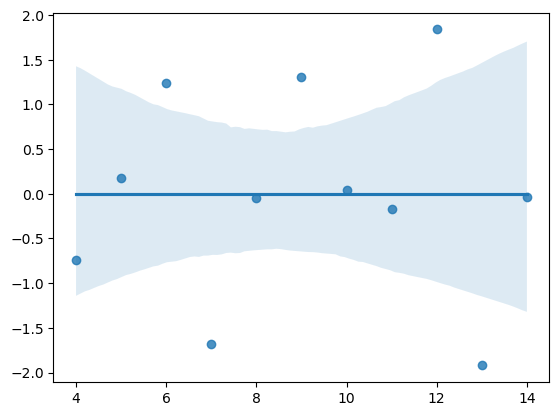

In [17]:
sns.regplot(x = X, y = rem);

#### Для любого значения $x$ значение зависимой переменной $y$ распределено нормально

In [18]:
from scipy.stats import shapiro

shapiro(rem)

ShapiroResult(statistic=0.9421076774597168, pvalue=0.5455849170684814)

#### Гомоскедастичность

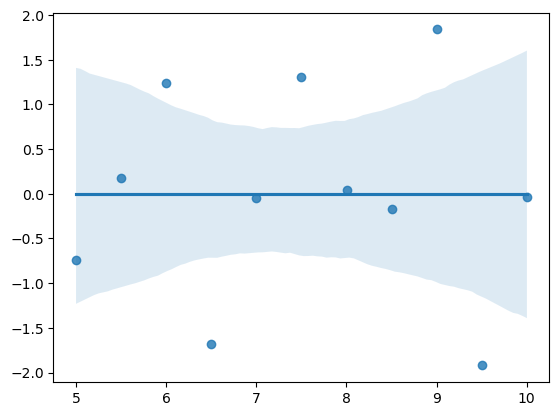

In [19]:
sns.regplot(x = y_pred, y = rem);

### 2.4 Оценить статистическую значимость полученной модели линейной регрессии.

In [20]:
alpha = 0.05
n, m = X.shape[0], 1
k1, k2 = m, n-m-1

# правосторонняя критическая область
Fk = stats.f.ppf(1-alpha, k1, k2)
Fk

5.117355029199227

In [21]:
My = np.mean(y)
Fn = np.sum((y_pred - My)**2) / np.sum((y - y_pred)**2) * (n-2)
Fn

17.98994296767698

In [22]:
Fn = R / (1-R) * (n-2)
Fn

17.98994296767698